In [3]:
# Célula 1: Imports

import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from database import DatabaseConnection


# Configurar estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Célula 2: Conectar e carregar dados
db = DatabaseConnection()
engine = db.get_engine()

# Carregar dados principais
df = pd.read_sql("SELECT * FROM analytics.games_sales", engine)
print(f"Total de jogos: {len(df)}")
df.head()

Total de jogos: 16327


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales,Decade,Sales_Category,game_id
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74,2000,Blockbuster,1
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24,1980,Blockbuster,2
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83,2000,Blockbuster,3
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00,2000,Blockbuster,4
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38,1990,Blockbuster,5


In [6]:
print(top_games.columns)
print(top_games.head())


Index(['game_id', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'Global_Sales', 'Sales_Category'],
      dtype='str')
   game_id                      Name Platform  Year         Genre Publisher  \
0        1                Wii Sports      Wii  2006        Sports  Nintendo   
1        2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2        3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3        4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4        5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   Global_Sales Sales_Category  
0         82.74    Blockbuster  
1         40.24    Blockbuster  
2         35.82    Blockbuster  
3         33.00    Blockbuster  
4         31.37    Blockbuster  


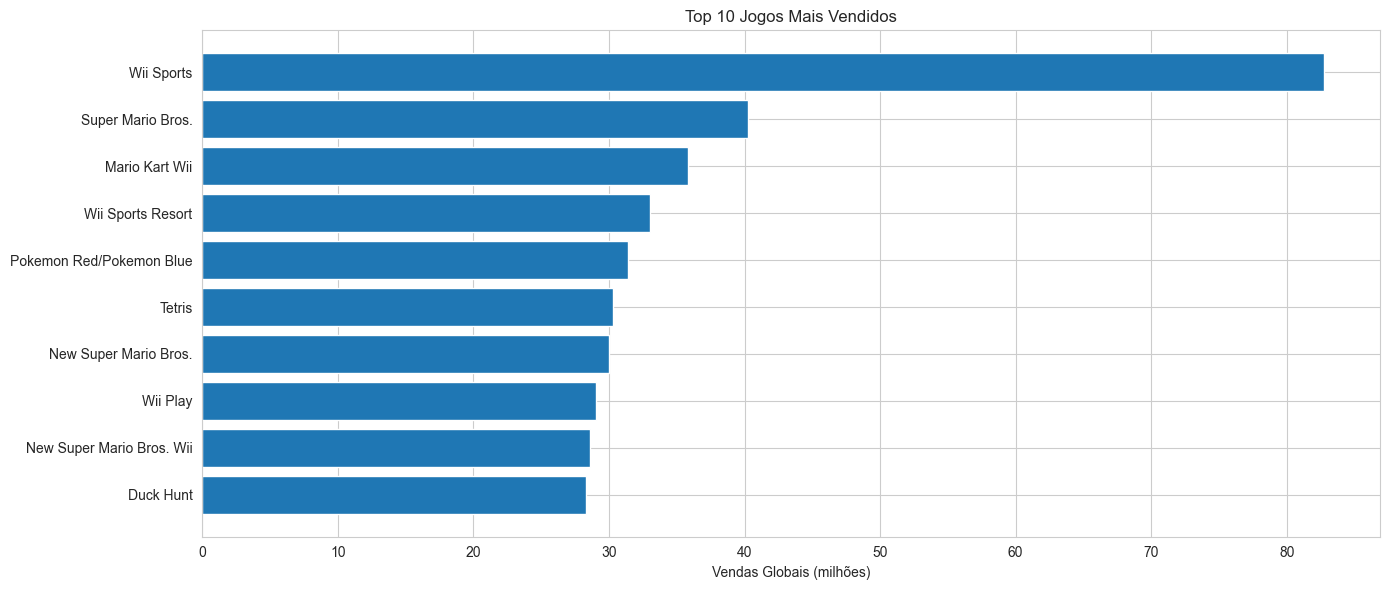

In [7]:
# Célula 3: Top 10 Jogos
top_games = pd.read_sql("SELECT * FROM analytics.top_games", engine)

plt.figure(figsize=(14, 6))
plt.barh(top_games['Name'], top_games['Global_Sales'])
plt.xlabel('Vendas Globais (milhões)')
plt.title('Top 10 Jogos Mais Vendidos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [12]:
sales_platform.columns


Index(['Platform', 'total_games', 'total_sales', 'avg_sales', 'max_sales'], dtype='str')

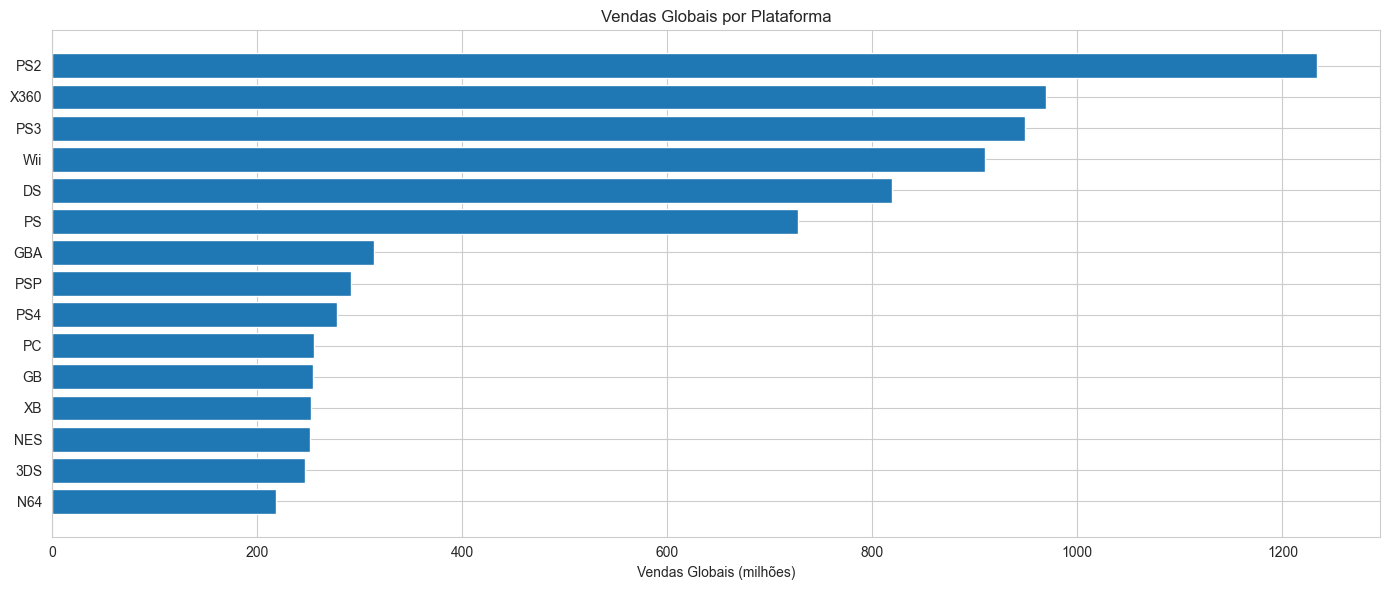

In [13]:
# Célula 4: Vendas por Plataforma
sales_platform = pd.read_sql(
    "SELECT * FROM analytics.sales_by_platform LIMIT 15",
    engine
)

# Ordenar para o barh funcionar corretamente
sales_platform = sales_platform.sort_values(
    by='total_sales',
    ascending=True
)

plt.figure(figsize=(14, 6))
plt.barh(
    sales_platform['Platform'],
    sales_platform['total_sales']
)
plt.xlabel('Vendas Globais (milhões)')
plt.title('Vendas Globais por Plataforma')
plt.tight_layout()
plt.show()

In [17]:
# Gráfico 1: Total de vendas
ax1.bar(
    sales_platform['Platform'],
    sales_platform['total_sales']
)
ax1.set_xlabel('Plataforma')
ax1.set_ylabel('Vendas Totais (milhões)')
ax1.set_title('Vendas Totais por Plataforma')
ax1.tick_params(axis='x', rotation=45)

In [20]:
# Gráfico 2: Quantidade de jogos
ax2.bar(sales_platform['platform'], sales_platform['total_games'], color='lightgreen')
ax2.set_xlabel('Plataforma')
ax2.set_ylabel('Quantidade de Jogos')
ax2.set_title('Número de Jogos por Plataforma')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

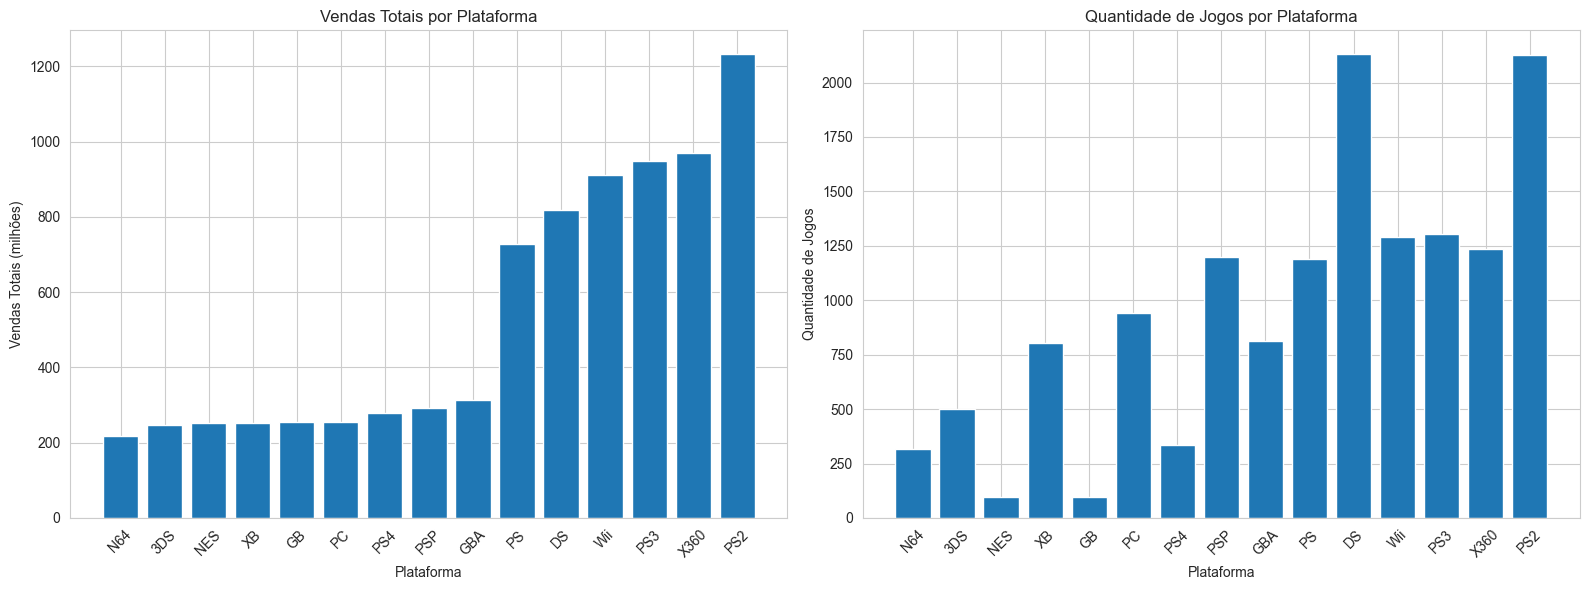

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura
sales_platform = pd.read_sql(
    "SELECT * FROM analytics.sales_by_platform LIMIT 15",
    engine
)

# Padronização
sales_platform.columns = sales_platform.columns.str.lower()

# Ordenação
sales_platform = sales_platform.sort_values(
    by='total_sales',
    ascending=True
)

# ===============================
# Figura + Eixos (OBRIGATÓRIO)
# ===============================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Vendas Totais
ax1.bar(
    sales_platform['platform'],
    sales_platform['total_sales']
)
ax1.set_title('Vendas Totais por Plataforma')
ax1.set_xlabel('Plataforma')
ax1.set_ylabel('Vendas Totais (milhões)')
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Quantidade de Jogos
ax2.bar(
    sales_platform['platform'],
    sales_platform['total_games']
)
ax2.set_title('Quantidade de Jogos por Plataforma')
ax2.set_xlabel('Plataforma')
ax2.set_ylabel('Quantidade de Jogos')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [25]:
# Célula 5: Vendas por Gênero
sales_genre = pd.read_sql("SELECT * FROM analytics.sales_by_genre", engine)

plt.figure(figsize=(12, 8))
plt.pie(sales_genre['total_sales'], 
        labels=sales_genre['genre'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribuição de Vendas por Gênero')
plt.axis('equal')
plt.show()

KeyError: 'genre'

<Figure size 1200x800 with 0 Axes>

ANTES: ['Genre', 'total_games', 'total_sales', 'avg_sales']
DEPOIS: ['genre', 'total_games', 'total_sales', 'avg_sales']


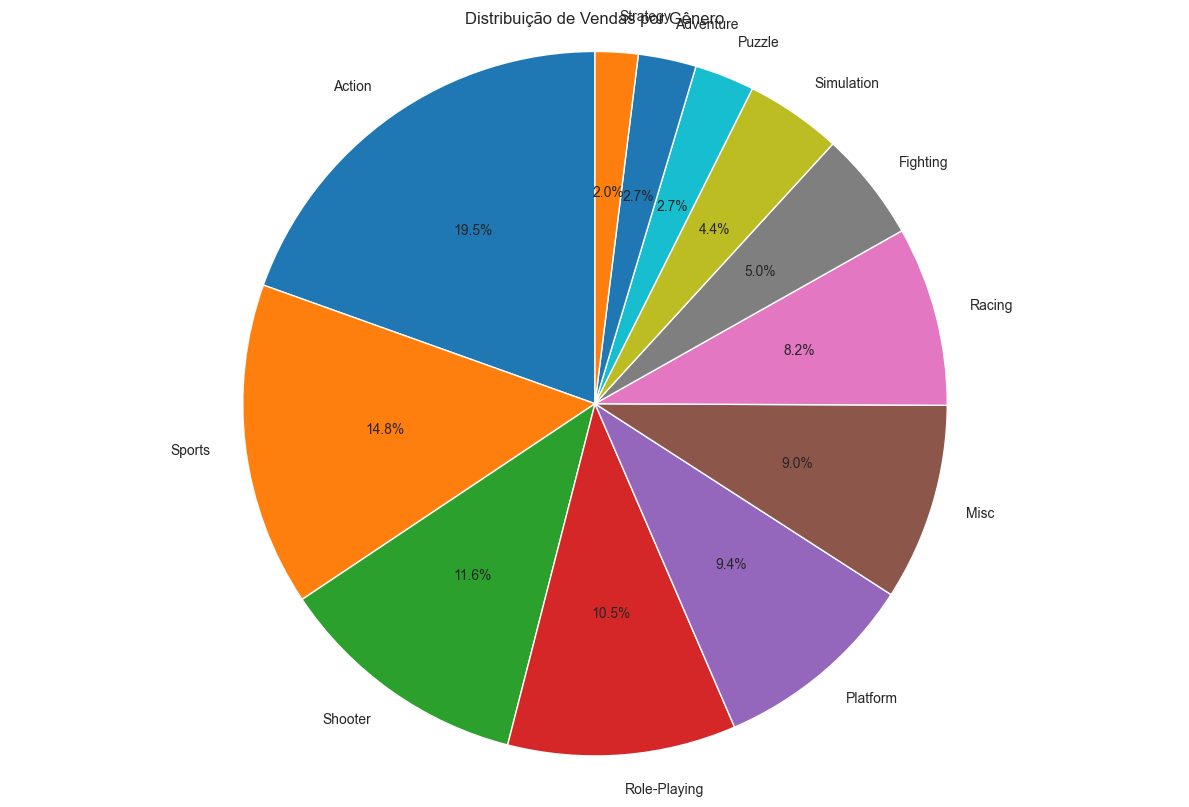

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura
sales_genre = pd.read_sql(
    "SELECT * FROM analytics.sales_by_genre",
    engine
)

# DEBUG obrigatório
print("ANTES:", sales_genre.columns.tolist())

# Padronização
sales_genre.columns = sales_genre.columns.str.lower()

print("DEPOIS:", sales_genre.columns.tolist())

# Ordenação (opcional, mas recomendada)
sales_genre = sales_genre.sort_values(
    by='total_sales',
    ascending=False
)

# Gráfico
plt.figure(figsize=(12, 8))
plt.pie(
    sales_genre['total_sales'],
    labels=sales_genre['genre'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribuição de Vendas por Gênero')
plt.axis('equal')
plt.tight_layout()
plt.show()


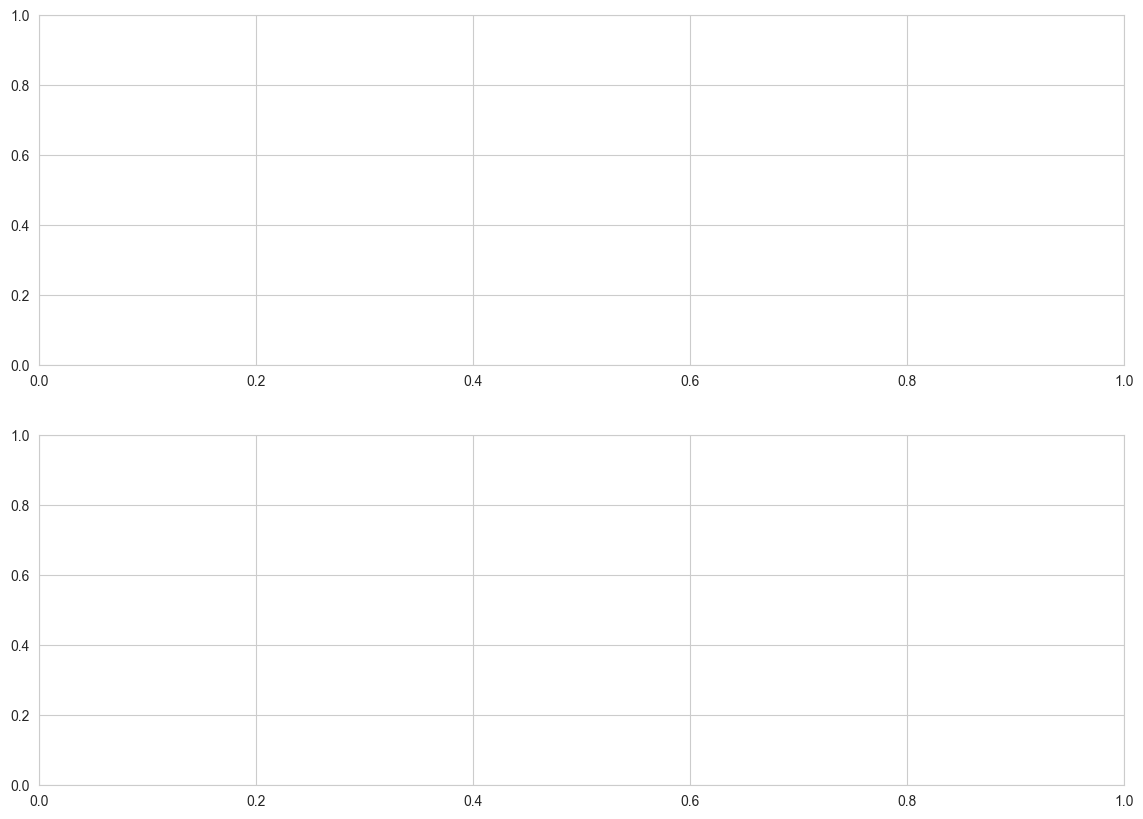

In [27]:
# Célula 6: Evolução Temporal
sales_decade = pd.read_sql("SELECT * FROM analytics.sales_by_decade", engine)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

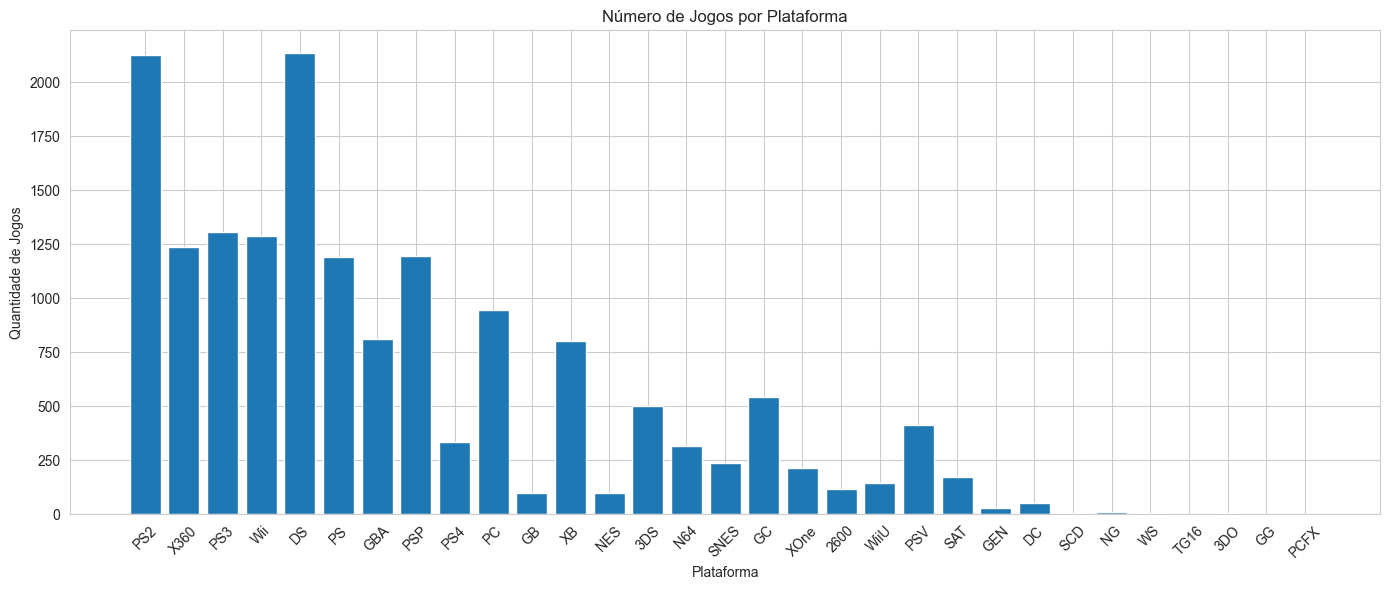

In [28]:

# Célula 6: Evolução Temporal
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Célula: Análise por Plataforma
# ===============================

# Ler dados do banco
sales_platform = pd.read_sql(
    "SELECT * FROM analytics.sales_by_platform",
    engine
)

# Garantir ordenação (opcional, mas recomendado)
sales_platform = sales_platform.sort_values(
    by="total_sales",
    ascending=False
)

# Criar figura e eixos
fig, ax2 = plt.subplots(figsize=(14, 6))

# Gráfico de barras
ax2.bar(
    sales_platform['Platform'],          # ✅ nome correto da coluna
    sales_platform['total_games']
)

# Labels e título
ax2.set_xlabel('Plataforma')
ax2.set_ylabel('Quantidade de Jogos')
ax2.set_title('Número de Jogos por Plataforma')

# Rotacionar eixo X
ax2.tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [29]:
# Vendas por década
ax1.plot(sales_decade['decade'], sales_decade['total_sales'], marker='o', linewidth=2, color='purple')
ax1.fill_between(sales_decade['decade'], sales_decade['total_sales'], alpha=0.3, color='purple')
ax1.set_xlabel('Década')
ax1.set_ylabel('Vendas Totais (milhões)')
ax1.set_title('Evolução das Vendas por Década')
ax1.grid(True, alpha=0.3)

KeyError: 'decade'

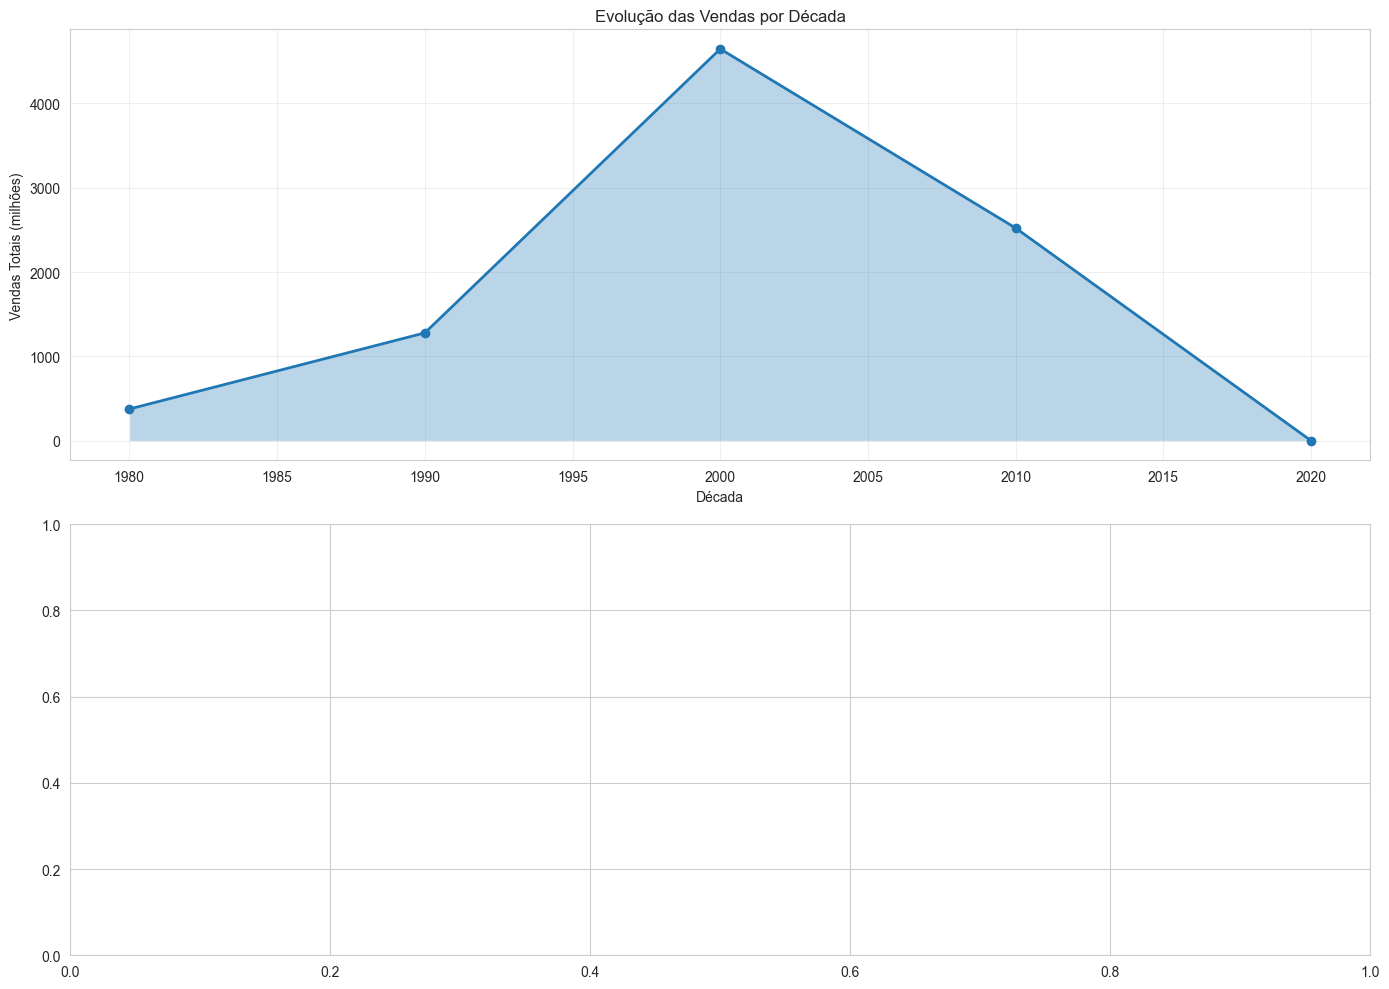

In [30]:
# Vendas por década

# ===============================
# Evolução das Vendas por Década
# ===============================

sales_decade = pd.read_sql(
    "SELECT * FROM analytics.sales_by_decade",
    engine
)

# Padronização (ESSENCIAL)
sales_decade.columns = sales_decade.columns.str.lower()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

ax1.plot(
    sales_decade['decade'],
    sales_decade['total_sales'],
    marker='o',
    linewidth=2
)

ax1.fill_between(
    sales_decade['decade'],
    sales_decade['total_sales'],
    alpha=0.3
)

ax1.set_xlabel('Década')
ax1.set_ylabel('Vendas Totais (milhões)')
ax1.set_title('Evolução das Vendas por Década')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [32]:
# Quantidade de jogos por década
ax2.bar(sales_decade['decade'], sales_decade['total_games'], color='teal', alpha=0.7)
ax2.set_xlabel('Década')
ax2.set_ylabel('Quantidade de Jogos')
ax2.set_title('Quantidade de Jogos Lançados por Década')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


KeyError: 'decade'

In [35]:
sales_decade = pd.read_sql(
    'SELECT * FROM analytics.sales_by_decade ORDER BY "Decade"',
    engine
)

sales_decade.columns = sales_decade.columns.str.lower()


In [36]:
# Quantidade de jogos por década

# Célula: Vendas por Década (leitura correta do PostgreSQL)

import pandas as pd

sales_decade = pd.read_sql(
    '''
    SELECT
        "Decade"      AS decade,
        total_sales,
        total_games
    FROM analytics.sales_by_decade
    ORDER BY "Decade"
    ''',
    engine
)

# Garantir padronização (boa prática)
sales_decade.columns = sales_decade.columns.str.lower()

# Visualização de conferência
display(sales_decade.head())


,decade,total_sales,total_games
0,1980,376.58,205
1,1990,1278.91,1769
2,2000,4644.02,9208
3,2010,2520.56,5144
4,2020,0.29,1


In [37]:
# Célula 7: Análise Regional
regional = pd.read_sql("""
    SELECT 
        SUM(na_sales) as north_america,
        SUM(eu_sales) as europe,
        SUM(jp_sales) as japan,
        SUM(other_sales) as other_regions
    FROM analytics.games_sales
""", engine)

regions = ['América do Norte', 'Europa', 'Japão', 'Outros']
sales = [
    regional['north_america'][0],
    regional['europe'][0],
    regional['japan'][0],
    regional['other_regions'][0]
]

plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
plt.bar(regions, sales, color=colors, alpha=0.8)
plt.ylabel('Vendas (milhões)')
plt.title('Vendas por Região Geográfica')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

DatabaseError: Execution failed on sql '
    SELECT 
        SUM(na_sales) as north_america,
        SUM(eu_sales) as europe,
        SUM(jp_sales) as japan,
        SUM(other_sales) as other_regions
    FROM analytics.games_sales
': (psycopg2.errors.UndefinedColumn) column "na_sales" does not exist
LINE 3:         SUM(na_sales) as north_america,
                    ^

[SQL: 
    SELECT 
        SUM(na_sales) as north_america,
        SUM(eu_sales) as europe,
        SUM(jp_sales) as japan,
        SUM(other_sales) as other_regions
    FROM analytics.games_sales
]
(Background on this error at: https://sqlalche.me/e/20/f405)

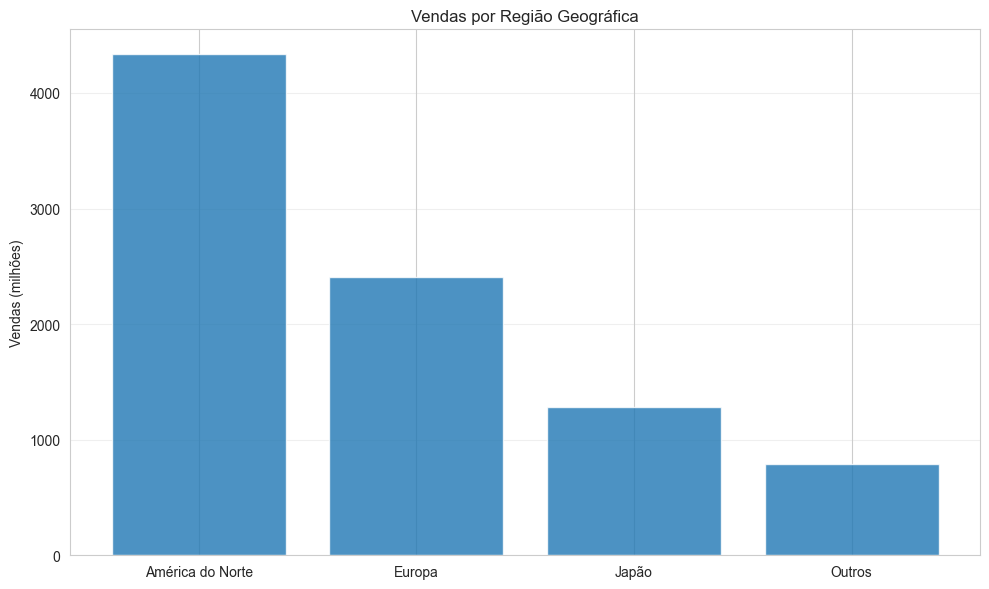

In [38]:
# Célula 7: Análise Regional

import pandas as pd
import matplotlib.pyplot as plt

# Leitura correta da base (resolvendo case-sensitive)
regional = pd.read_sql(
    '''
    SELECT
        SUM("NA_Sales")    AS north_america,
        SUM("EU_Sales")    AS europe,
        SUM("JP_Sales")    AS japan,
        SUM("Other_Sales") AS other_regions
    FROM analytics.games_sales
    ''',
    engine
)

# Garantir padronização (boa prática)
regional.columns = regional.columns.str.lower()

# Dados para o gráfico
regions = ['América do Norte', 'Europa', 'Japão', 'Outros']
sales = [
    regional.loc[0, 'north_america'],
    regional.loc[0, 'europe'],
    regional.loc[0, 'japan'],
    regional.loc[0, 'other_regions']
]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(
    regions,
    sales,
    alpha=0.8
)

plt.ylabel('Vendas (milhões)')
plt.title('Vendas por Região Geográfica')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [39]:
# Célula 8: Matriz de correlação
sales_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
correlation = df[sales_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlação entre Vendas Regionais')
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'], dtype='str')] are in the [columns]"

In [42]:
# Célula 8: Matriz de correlação

import matplotlib.pyplot as plt
import seaborn as sns

# Colunas de vendas
sales_cols = [
    'na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales',
    'global_sales'
]

# Correlação
correlation = df[sales_cols].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlação entre Vendas Regionais')
plt.tight_layout()
plt.show()


KeyError: "None of [Index(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'], dtype='str')] are in the [columns]"

Colunas disponíveis: ['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'total_sales', 'decade', 'sales_category', 'game_id']
Colunas usadas na correlação: ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'total_sales']


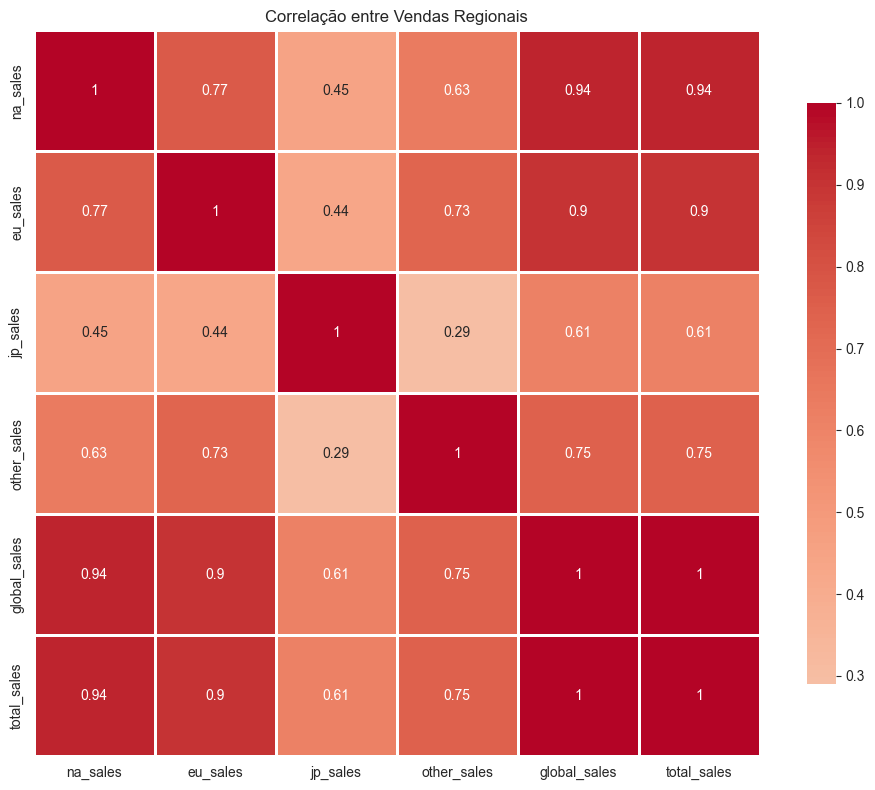

In [47]:
# Célula 8: Matriz de correlação

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Carregar dados
df = pd.read_sql(
    "SELECT * FROM analytics.games_sales",
    engine
)

# 2️⃣ Normalizar nomes das colunas
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

print("Colunas disponíveis:", df.columns.tolist())

# 3️⃣ Selecionar SOMENTE colunas numéricas relacionadas a vendas
sales_cols = [
    col for col in df.select_dtypes(include='number').columns
    if 'sales' in col
]

print("Colunas usadas na correlação:", sales_cols)

# 4️⃣ Criar matriz de correlação
correlation = df[sales_cols].corr()

# 5️⃣ Plotar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlação entre Vendas Regionais')
plt.tight_layout()
plt.show()
